### visualise subgroup based on model comparison

In [1]:
import numpy as np
import nilearn.plotting

#### one model posterior mean (l) and prediction error (KL divergence) with h and l pain 

In [2]:
#     con_names = ['Stim_ppxpmod_mean^1','Stim_pexpmod_pe^1', 'High','Low']
#     # pmod contrasts
#     cont01 = ['pmod_mean', 'T', con_names, [1,0,0,0]]
#     cont02 = ['pmod_mean_neg', 'T', con_names, [-1,0,0,0]]
#     cont03 = ['pmod_pe', 'T', con_names, [0,1,0,0]]
#     cont04 = ['pmod_pe_neg', 'T', con_names, [0,-1,0,0]]
#     cont05 = ['High>Low','T', con_names, [0,0,1,-1]]
#     cont06 = ['Low>High','T', con_names, [0,0,-1,1]]

### jump frequency model, frequency subjects

In [9]:
# frequency subjects (n=23)
%ls ../../../TSL_output/1stLevel_io_jf_fg/1stLevel/

sub-06/  sub-13/  sub-17/  sub-21/  sub-27/  sub-32/  sub-37/  sub-42/
sub-07/  sub-14/  sub-19/  sub-24/  sub-30/  sub-33/  sub-39/  sub-43/
sub-10/  sub-16/  sub-20/  sub-26/  sub-31/  sub-36/  sub-41/


##### contrast01 posterior mean of low pain

In [10]:
bg = '../../../TSL_anat/mean_anat.nii.gz'

In [11]:
# pmod posterior mean
img = '../../../TSL_output/2ndLevel_io_jf_fg_FDR0001/2ndLevel/con_0001/spmT_0001_thr.nii'
z_map = img

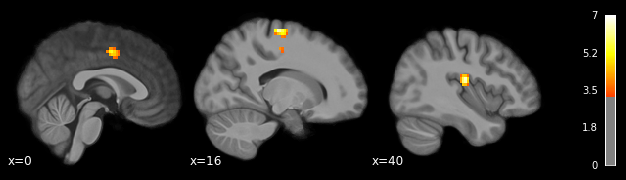

In [15]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_freq_pl_x.pdf')

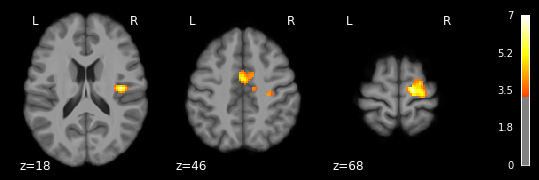

In [16]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_pl_z.pdf')

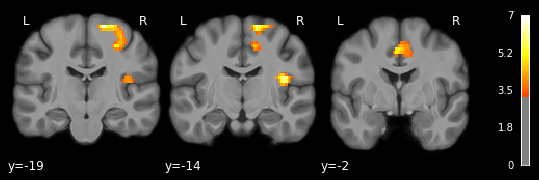

In [17]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_pl_y.pdf')

In [13]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [14]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  40 & -14 &  18 &      6.563 &               1132 \\
1 &          2 &  16 & -19 &  68 &      6.519 &               3360 \\
2 &         2a &  28 & -19 &  49 &      5.188 &                    \\
3 &         2b &  23 & -10 &  68 &      5.027 &                    \\
4 &         2c &  33 & -22 &  58 &      4.856 &                    \\
5 &          3 &   0 &  -2 &  46 &      5.451 &               2318 \\
6 &         3a &  13 & -17 &  49 &      4.697 &                    \\
7 &         3b &   9 &   0 &  43 &      4.394 &                    \\
\bottomrule
\end{tabular}



##### contrast02 posterior mean of low pain negative (high pain)

In [18]:
# pmod posterior mean negative (high pain)
img = '../../../TSL_output/2ndLevel_io_jf_fg_FDR0001/2ndLevel/con_0002/spmT_0001_thr.nii'
z_map = img

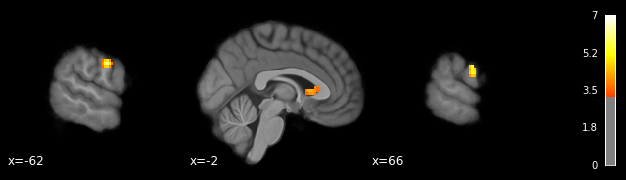

In [24]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_freq_ph_x.pdf')

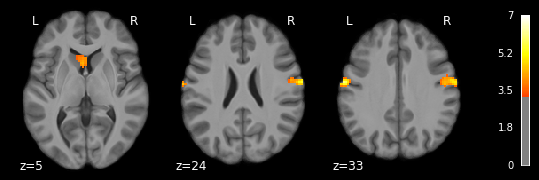

In [25]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_ph_z.pdf')

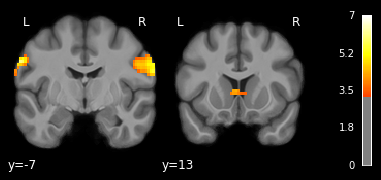

In [26]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_ph_y.pdf')

In [22]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [23]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 & -62 &  -7 &  33 &      6.087 &               2300 \\
1 &         1a & -53 & -14 &  49 &      5.310 &                    \\
2 &          2 &  66 &  -7 &  24 &      5.490 &               2731 \\
3 &         2a &  54 &  -5 &  30 &      4.652 &                    \\
4 &          3 &  -2 &  13 &   5 &      4.426 &                970 \\
5 &         3a &   6 &  13 &   2 &      3.590 &                    \\
\bottomrule
\end{tabular}



##### contrast03 kl divergenece pe

In [27]:
# pmod kl divergence pe
img = '../../../TSL_output/2ndLevel_io_jf_fg_FDR0001/2ndLevel/con_0003/spmT_0001_thr.nii'
z_map = img

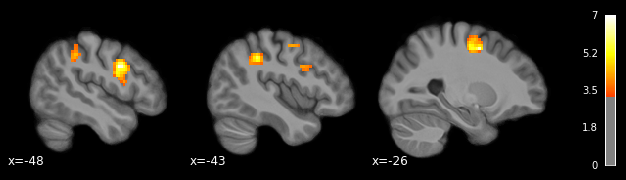

In [31]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_kl_x.pdf')

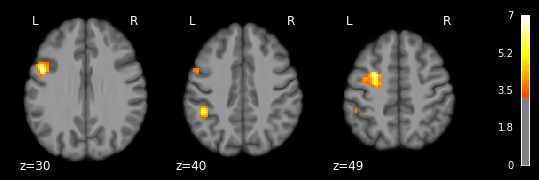

In [32]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_kl_z.pdf')

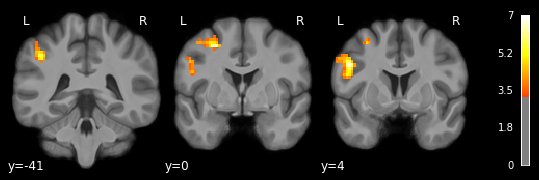

In [33]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_kl_y.pdf')

In [29]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [30]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 & -48 &   4 &  30 &      6.950 &               3522 \\
1 &         1a & -48 &   9 &  15 &      4.187 &                    \\
2 &         1b & -60 &   6 &  18 &      3.711 &                    \\
3 &          2 & -26 &   0 &  49 &      6.521 &               3558 \\
4 &         2a & -38 &  -7 &  55 &      5.676 &                    \\
5 &         2b & -26 &  -7 &  49 &      5.445 &                    \\
6 &         2c & -29 &  -7 &  58 &      5.124 &                    \\
7 &          3 & -43 & -41 &  40 &      5.783 &               1401 \\
\bottomrule
\end{tabular}



##### contrast04 kl divergence negative contrast

In [34]:
# pmod kl divergence negative
img = '../../../TSL_output/2ndLevel_io_jf_fg_FDR0001/2ndLevel/con_0004/spmT_0001_thr.nii'
z_map = img

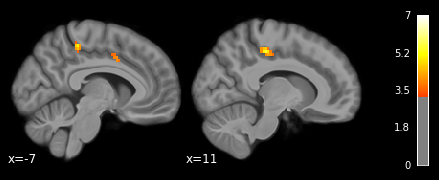

In [39]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_nkl_x.pdf')

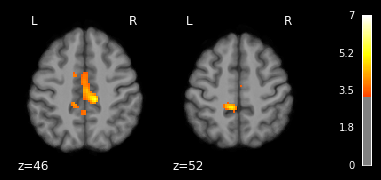

In [40]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_nkl_z.pdf')

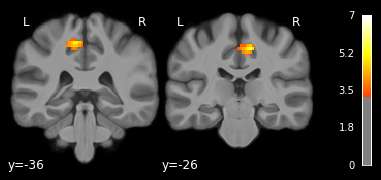

In [41]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg)
# g.savefig('./figs/io_jump_nkl_y.pdf')

In [37]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [38]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  11 & -26 &  46 &      5.597 &               3612 \\
1 &         1a &   1 & -17 &  46 &      4.495 &                    \\
2 &         1b & -10 &   4 &  36 &      4.343 &                    \\
3 &         1c &   0 &  -7 &  49 &      4.117 &                    \\
4 &          2 &  -7 & -36 &  52 &      5.132 &               1060 \\
5 &         2a &   0 & -41 &  46 &      3.752 &                    \\
\bottomrule
\end{tabular}



### jump transition model, transition subjects

In [42]:
# frequency subjects (n=12)
%ls ../../../TSL_output/1stLevel_io_jt_tg/1stLevel/

sub-08/  sub-11/  sub-18/  sub-23/  sub-28/  sub-38/
sub-09/  sub-15/  sub-22/  sub-25/  sub-29/  sub-44/


##### contrast01 posterior mean of low pain

In [79]:
# pmod posterior mean
img = '../../../TSL_output/2ndLevel_io_jt_tg_FDR0001/2ndLevel/con_0001/spmT_0001_thr.nii'
z_map = img

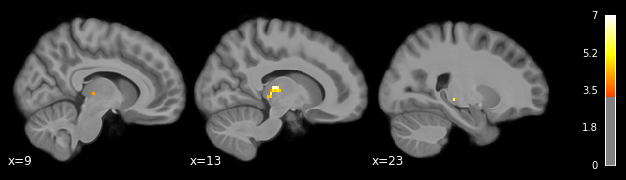

In [86]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_freq_pl_x.pdf')

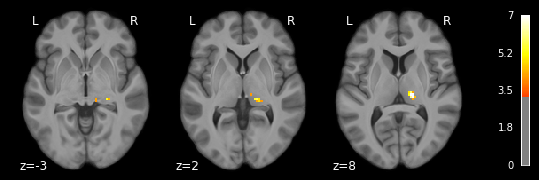

In [87]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_pl_z.pdf')

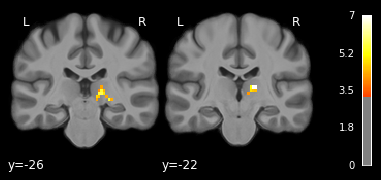

In [88]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_pl_y.pdf')

In [84]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=0)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [85]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &  Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  13 & -22 &  8 &      8.089 &                700 \\
1 &         1a &  16 & -26 &  2 &      5.766 &                    \\
2 &          2 &  23 & -26 & -3 &      5.433 &                 35 \\
3 &          3 &   9 & -22 &  2 &      4.143 &                 17 \\
\bottomrule
\end{tabular}



##### contrast02 posterior mean of low pain negative (high pain) EMPTY

In [89]:
# pmod posterior mean negative (high pain)
img = '../../../TSL_output/2ndLevel_io_jt_tg_FDR0001/2ndLevel/con_0002/spmT_0001_thr.nii'
z_map = img

In [90]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_freq_ph_x.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/masking.py:445: MaskWarning: Computed an empty mask. Are you sure that input images have a homogeneous background.
  mask, affine = _post_process_mask(mask, affine, opening=opening,


ValueError: The mask is invalid as it is empty: it masks all data.

In [91]:
# peak_x = np.unique(peaks['Z'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_freq_ph_z.pdf')

In [92]:
# peak_x = np.unique(peaks['Y'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_freq_ph_y.pdf')

In [93]:
# from nilearn.reporting import get_clusters_table
# table = get_clusters_table(clean_map, stat_threshold=threshold,
#                            cluster_threshold=10)
# table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
# table[['Peak Stat']] = table[['Peak Stat']].round(3)
# peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [94]:
# print(table.to_latex())

##### contrast03 kl divergenece pe

In [95]:
# pmod kl divergence pe
img = '../../../TSL_output/2ndLevel_io_jt_tg_FDR0001/2ndLevel/con_0003/spmT_0001_thr.nii'
z_map = img

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:1608: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,


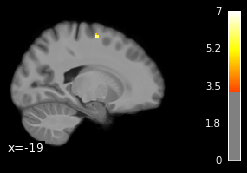

In [100]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_kl_x.pdf')

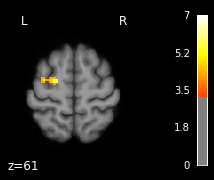

In [101]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_kl_z.pdf')

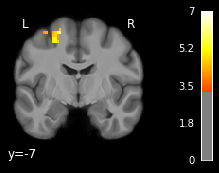

In [102]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_kl_y.pdf')

In [98]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [99]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &  Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 & -19 & -7 &  61 &      6.017 &               1096 \\
1 &         1a & -24 & -5 &  55 &      5.537 &                    \\
2 &         1b & -34 & -5 &  61 &      4.969 &                    \\
\bottomrule
\end{tabular}



##### contrast04 kl divergence negative contrast - EMPTY

In [103]:
# pmod kl divergence negative
img = '../../../TSL_output/2ndLevel_io_jt_tg_FDR0001/2ndLevel/con_0004/spmT_0001_thr.nii'
z_map = img

In [104]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_nkl_x.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/masking.py:445: MaskWarning: Computed an empty mask. Are you sure that input images have a homogeneous background.
  mask, affine = _post_process_mask(mask, affine, opening=opening,


ValueError: The mask is invalid as it is empty: it masks all data.

In [105]:
# peak_x = np.unique(peaks['Z'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_nkl_z.pdf')

In [106]:
# peak_x = np.unique(peaks['Y'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='y', cut_coords=(peak_x), bg_img=bg)
# # g.savefig('./figs/io_jump_nkl_y.pdf')

In [107]:
# from nilearn.reporting import get_clusters_table
# table = get_clusters_table(clean_map, stat_threshold=threshold,
#                            cluster_threshold=10)
# table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
# table[['Peak Stat']] = table[['Peak Stat']].round(3)
# peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [108]:
# print(table.to_latex())

### jump frequency model, transition subjects

In [110]:
# frequency subjects (n=12)
%ls ../../../TSL_output/1stLevel_io_jf_tg/1stLevel/

sub-08/  sub-11/  sub-18/  sub-23/  sub-28/  sub-38/
sub-09/  sub-15/  sub-22/  sub-25/  sub-29/  sub-44/


##### contrast01 posterior mean of low pain - EMPTY

In [111]:
# pmod posterior mean
img = '../../../TSL_output/2ndLevel_io_jf_tg_FDR0001/2ndLevel/con_0001/spmT_0001_thr.nii'
z_map = img

In [112]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_freq_pl_x.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/masking.py:445: MaskWarning: Computed an empty mask. Are you sure that input images have a homogeneous background.
  mask, affine = _post_process_mask(mask, affine, opening=opening,


ValueError: The mask is invalid as it is empty: it masks all data.

In [115]:
# peak_x = np.unique(peaks['Z'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_freq_pl_z.pdf')

In [116]:
# peak_x = np.unique(peaks['Y'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_freq_pl_y.pdf')

In [117]:
# from nilearn.reporting import get_clusters_table
# table = get_clusters_table(clean_map, stat_threshold=threshold,
#                            cluster_threshold=10)
# table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
# table[['Peak Stat']] = table[['Peak Stat']].round(3)
# peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [118]:
# print(table.to_latex())

##### contrast02 posterior mean of low pain negative (high pain) - EMPTY

In [119]:
# pmod posterior mean negative (high pain)
img = '../../../TSL_output/2ndLevel_io_jf_tg_FDR0001/2ndLevel/con_0002/spmT_0001_thr.nii'
z_map = img

In [120]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_freq_ph_x.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/masking.py:445: MaskWarning: Computed an empty mask. Are you sure that input images have a homogeneous background.
  mask, affine = _post_process_mask(mask, affine, opening=opening,


ValueError: The mask is invalid as it is empty: it masks all data.

In [121]:
# peak_x = np.unique(peaks['Z'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_freq_ph_z.pdf')

In [122]:
# peak_x = np.unique(peaks['Y'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_freq_ph_y.pdf')

In [123]:
# from nilearn.reporting import get_clusters_table
# table = get_clusters_table(clean_map, stat_threshold=threshold,
#                            cluster_threshold=10)
# table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
# table[['Peak Stat']] = table[['Peak Stat']].round(3)
# peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [124]:
# print(table.to_latex())

##### contrast03 kl divergenece pe - EMPTY

In [125]:
# pmod kl divergence pe
img = '../../../TSL_output/2ndLevel_io_jf_tg_FDR0001/2ndLevel/con_0003/spmT_0001_thr.nii'
z_map = img

In [126]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_kl_x.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/masking.py:445: MaskWarning: Computed an empty mask. Are you sure that input images have a homogeneous background.
  mask, affine = _post_process_mask(mask, affine, opening=opening,


ValueError: The mask is invalid as it is empty: it masks all data.

In [127]:
# peak_x = np.unique(peaks['Z'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_kl_z.pdf')

In [128]:
# peak_x = np.unique(peaks['Y'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_kl_y.pdf')

In [129]:
# from nilearn.reporting import get_clusters_table
# table = get_clusters_table(clean_map, stat_threshold=threshold,
#                            cluster_threshold=10)
# table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
# table[['Peak Stat']] = table[['Peak Stat']].round(3)
# peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [130]:
# print(table.to_latex())

##### contrast04 kl divergence negative contrast - EMPTY

In [131]:
# pmod kl divergence negative
img = '../../../TSL_output/2ndLevel_io_jf_tg_FDR0001/2ndLevel/con_0004/spmT_0001_thr.nii'
z_map = img

In [133]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_nkl_x.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/masking.py:445: MaskWarning: Computed an empty mask. Are you sure that input images have a homogeneous background.
  mask, affine = _post_process_mask(mask, affine, opening=opening,


ValueError: The mask is invalid as it is empty: it masks all data.

In [134]:
# peak_x = np.unique(peaks['Z'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# # g.savefig('./figs/io_jump_nkl_z.pdf')

In [135]:
# peak_x = np.unique(peaks['Y'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='y', cut_coords=(peak_x), bg_img=bg)
# # g.savefig('./figs/io_jump_nkl_y.pdf')

In [136]:
# from nilearn.reporting import get_clusters_table
# table = get_clusters_table(clean_map, stat_threshold=threshold,
#                            cluster_threshold=10)
# table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
# table[['Peak Stat']] = table[['Peak Stat']].round(3)
# peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [137]:
# print(table.to_latex())

### jump transition model, frequency subjects

In [138]:
# frequency subjects (n=23)
%ls ../../../TSL_output/1stLevel_io_jt_fg/1stLevel/

sub-06/  sub-13/  sub-17/  sub-21/  sub-27/  sub-32/  sub-37/  sub-42/
sub-07/  sub-14/  sub-19/  sub-24/  sub-30/  sub-33/  sub-39/  sub-43/
sub-10/  sub-16/  sub-20/  sub-26/  sub-31/  sub-36/  sub-41/


##### contrast01 posterior mean of low pain

In [139]:
# pmod posterior mean
img = '../../../TSL_output/2ndLevel_io_jt_fg_FDR0001/2ndLevel/con_0001/spmT_0001_thr.nii'
z_map = img

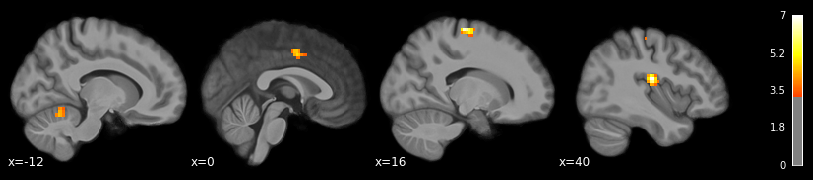

In [143]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_freq_pl_x.pdf')

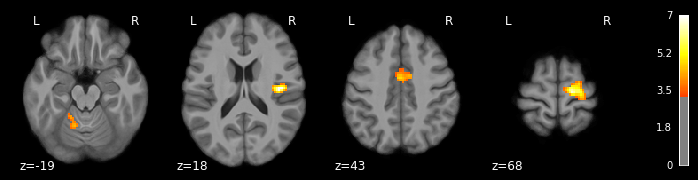

In [144]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_pl_z.pdf')

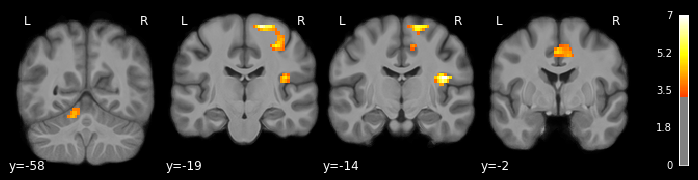

In [145]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_pl_y.pdf')

In [141]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [142]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  40 & -14 &  18 &      7.075 &               1311 \\
1 &          2 &  16 & -19 &  68 &      6.672 &               3917 \\
2 &         2a &  30 & -19 &  49 &      5.243 &                    \\
3 &          3 &   0 &  -2 &  43 &      4.856 &               2030 \\
4 &         3a &   6 &   0 &  40 &      4.550 &                    \\
5 &         3b &   6 & -10 &  52 &      4.471 &                    \\
6 &          4 & -12 & -58 & -19 &      4.518 &                772 \\
7 &         4a & -17 & -48 & -19 &      4.234 &                    \\
\bottomrule
\end{tabular}



##### contrast02 posterior mean of low pain negative (high pain)

In [146]:
# pmod posterior mean negative (high pain)
img = '../../../TSL_output/2ndLevel_io_jt_fg_FDR0001/2ndLevel/con_0002/spmT_0001_thr.nii'
z_map = img

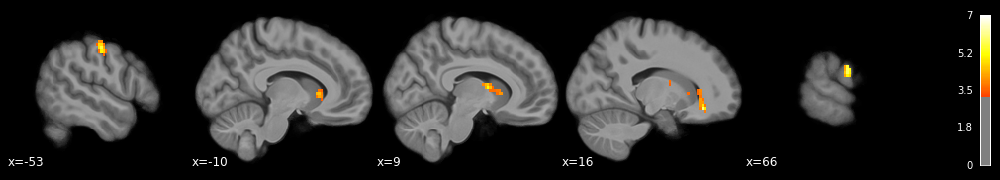

In [150]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_freq_ph_x.pdf')

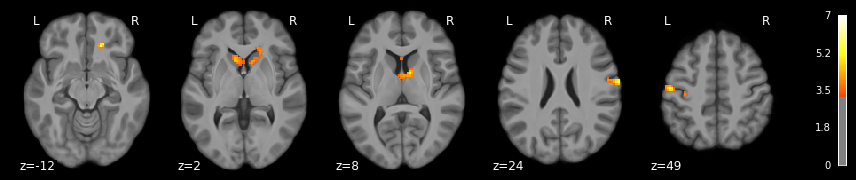

In [151]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_ph_z.pdf')

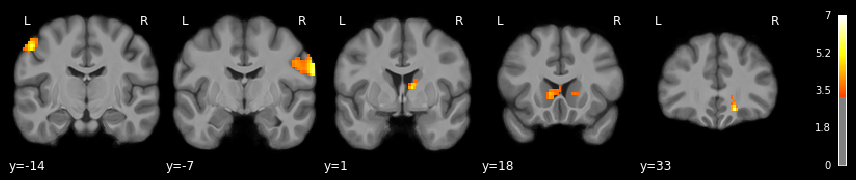

In [152]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_freq_ph_y.pdf')

In [148]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [149]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  16 &  33 & -12 &      6.071 &                808 \\
1 &         1a &  21 &  25 &   0 &      4.364 &                    \\
2 &          2 &  66 &  -7 &  24 &      5.885 &               2066 \\
3 &         2a &  54 &  -5 &  27 &      4.241 &                    \\
4 &          3 & -53 & -14 &  49 &      5.617 &               1257 \\
5 &         3a & -38 & -19 &  52 &      3.997 &                    \\
6 &          4 &   9 &   1 &   8 &      5.171 &               1078 \\
7 &         4a &   9 &  13 &   2 &      4.150 &                    \\
8 &          5 & -10 &  18 &   2 &      4.570 &                880 \\
9 &         5a &  -2 &  11 &   5 &      4.072 &                    \\
\bottomrule
\end{tabular}



##### contrast03 kl divergenece pe

In [153]:
# pmod kl divergence pe
img = '../../../TSL_output/2ndLevel_io_jt_fg_FDR0001/2ndLevel/con_0003/spmT_0001_thr.nii'
z_map = img

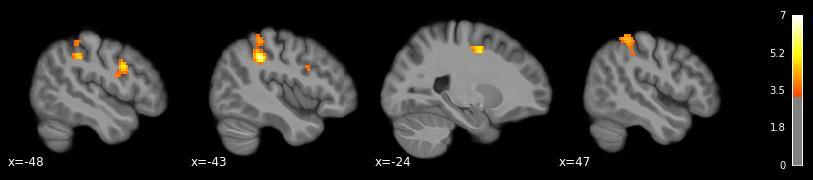

In [157]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_kl_x.pdf')

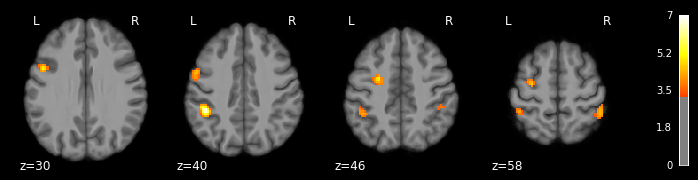

In [158]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_kl_z.pdf')

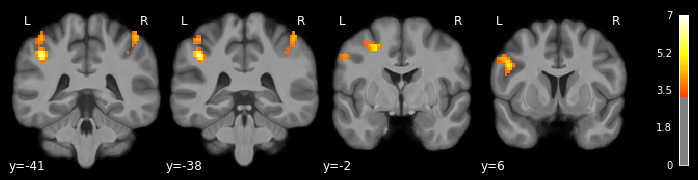

In [159]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_kl_y.pdf')

In [155]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [156]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 & -43 & -38 &  40 &      6.626 &               2048 \\
1 &         1a & -43 & -41 &  55 &      4.402 &                    \\
2 &          2 & -24 &  -2 &  46 &      5.170 &               2084 \\
3 &         2a & -29 & -10 &  58 &      4.627 &                    \\
4 &          3 & -48 &   6 &  30 &      5.167 &               2066 \\
5 &         3a & -55 &   4 &  36 &      4.699 &                    \\
6 &         3b & -50 &   1 &  21 &      4.283 &                    \\
7 &          4 &  47 & -41 &  58 &      4.470 &               1240 \\
8 &         4a &  45 & -36 &  46 &      3.731 &                    \\
\bottomrule
\end{tabular}



##### contrast04 kl divergence negative contrast

In [160]:
# pmod kl divergence negative
img = '../../../TSL_output/2ndLevel_io_jt_fg_FDR0001/2ndLevel/con_0004/spmT_0001_thr.nii'
z_map = img

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:1608: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,


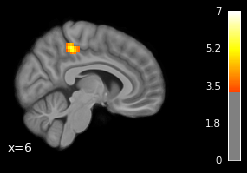

In [164]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
# g.savefig('./figs/io_jump_nkl_x.pdf')

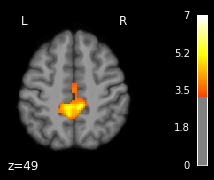

In [165]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs/io_jump_nkl_z.pdf')

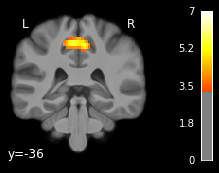

In [166]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg)
# g.savefig('./figs/io_jump_nkl_y.pdf')

In [162]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [163]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &  X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  6 & -36 &  49 &      5.711 &               7062 \\
1 &         1a & -5 & -36 &  52 &      5.618 &                    \\
2 &         1b & -7 &   4 &  36 &      5.327 &                    \\
3 &         1c & -5 & -43 &  49 &      5.254 &                    \\
\bottomrule
\end{tabular}

